# Pretrained Model을 활용하여 이미지 분류하기

참고) https://www.tensorflow.org/api_docs/python/tf/keras/applications

Pretrained Model은 ImageNet과 같은 대규모 이미지 데이터 세트에 대해 훈련된 신경망 모형이다. 

![imagenet](images/Model_Timeline.png)

imagenet으로 사전 훈련된 모형을 로드할 수 있다.

### 모형의 비교
![imagenet](images/Pre-Trained-Model-Comparison.png)

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

### 1 단계 : 사전 훈련 된 모델로드
일반적으로 사전 훈련된 모델의 확장자는 .pt 또는 .pth 이다.
가중치가 다운로드되면 다음과 같이 네트워크 아키텍처에 대한 세부 정보를 확인할 수도 있다.
모델은 기본적으로 ~/.keras/models/ 디렉토리에 다운로드 된다.

In [2]:
model = ResNet50(weights='imagenet')

In [3]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### 2 단계 : 입력 이미지로드 및 전처리
입력 이미지를 로드하고 이미지 변환을 수행한다.
모델을 다운로드 하고나면 다음 단계는 입력 이미지를 올바른 shape 등을 변환하고, 예측에 알맞은 형태로 전처리 한다.

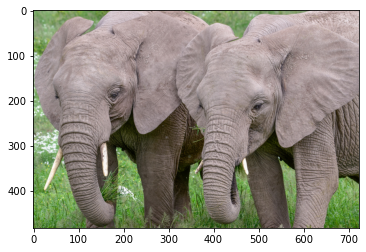

In [4]:
# Import Pillow
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open("images/elephant.jpg")

plt.imshow(img)

In [5]:
img_path = 'images/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

### 3 단계 : 예측 결과 확인

In [6]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)

In [7]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.9338021), ('n02504013', 'Indian_elephant', 0.037341148), ('n01871265', 'tusker', 0.028762361)]
